In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
#Load Fashion Minst dataset
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values to [0,1] range(important for neural networks)
X_train,X_test = X_train/255.0 , X_test/255.0

X_train,X_val = X_train[:54000],X_train[54000:]
y_train,y_val = y_train[:54000],y_train[54000:]

In [23]:
X_train.shape

(54000, 28, 28)

In [24]:
# Define a simple neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #Flatten 28x28 images
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.3), # Dropout to prevent overfitting
    tf.keras.layers.Dense(10,activation='softmax') # output layer (10 classes)
])

#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
# Define Early stopping callback

early_stopping = EarlyStopping(
    monitor='val_loss', # Stop training if validation loss increases
    patience= 5, # Wait for 5 epochs before stopping
    restore_best_weights= True #Restore best weights
) 


#Train the model with the early stopping

history = model.fit(
    X_train,y_train,
    validation_data = (X_val,y_val),
    epochs = 50,    # Train for up to 50 epochs
    batch_size = 32,
    callbacks = [early_stopping] # Apply early stopping
)

Epoch 1/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5602 - accuracy: 0.8034 - val_loss: 0.4200 - val_accuracy: 0.8398
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4248 - accuracy: 0.8467 - val_loss: 0.3744 - val_accuracy: 0.8632
Epoch 3/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3893 - accuracy: 0.8584 - val_loss: 0.3581 - val_accuracy: 0.8693
Epoch 4/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3680 - accuracy: 0.8656 - val_loss: 0.3391 - val_accuracy: 0.8740
Epoch 5/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3537 - accuracy: 0.8697 - val_loss: 0.3421 - val_accuracy: 0.8693
Epoch 6/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3394 - accuracy: 0.8744 - val_loss: 0.3392 - val_accuracy: 0.8737
Epoch 7/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3304 - accuracy: 0.8774 - val_loss: 0.3363 - val_accuracy:

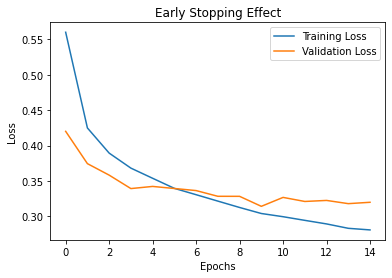

In [26]:
# Plot training & validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Early Stopping Effect')
plt.show()


In [27]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 0s - loss: 0.3380 - accuracy: 0.8803
Test Accuracy: 0.8803
